# Loading and processing the data sets

Let's start with loading the training data:

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
os.listdir()

['.DS_Store',
 '.git',
 '.ipynb_checkpoints',
 '.Rapp.history',
 '.RDataTmp',
 '.Rhistory',
 'GBM.rds',
 'GBM.stack.rds',
 'Kaggle Mercari Price Suggestion Challenge IPython Kernel.ipynb',
 'KaggleMercariPriceSuggestionChallengeKernel.Rmd',
 'Mercari Price Suggestion Challenge | Kaggle.pdf',
 'merged_table.rds',
 'mini_subtrain.rds',
 'mini_subtrain_locked.rds',
 'mini_train.rds',
 'new_stack_set.rds',
 'new_stack_set2.rds',
 'RF.BC.rds',
 'RF.rds',
 'RF.stack.rds',
 'RF.stack2nd.rds',
 'sample_submission.csv',
 'sample_submission.csv.7z',
 'second.stack.set.rds',
 'subtrain.rds',
 'subtrain_locked.rds',
 'SVM.rds',
 'SVM.stack.rds',
 'test.csv',
 'test.rds',
 'test.tsv.7z',
 'test_locked.rds',
 'train.csv',
 'train.rds',
 'train.tsv.7z',
 'v.txt',
 'validation.rds',
 'validation_locked.rds',
 'X_holdout.csv',
 'X_train.csv',
 'xGBM.BC.rds',
 'xGBM.BC2.rds',
 'xGBM.rds',
 'xGBM.stack.rds',
 'xGBM.stack2nd.rds',
 'y_holdout.csv',
 'y_train.csv']

In [74]:
train = pd.read_csv("train.csv")

In [4]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


First, let's remove the train_id from the training set, and map the numeric and character variables to being with:

In [78]:
train = train.drop("train_id",axis = 1)
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 7 columns):
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 79.2+ MB


In [85]:
Numeric_features_select = np.logical_or((pd.Series(train.dtypes)) == "int64",(pd.Series(train.dtypes) == "float64")).tolist()

In [86]:
Numeric_features = pd.Series(train.columns)[Numeric_features_select].tolist()

In [88]:
Numeric_features.remove('price')

In [89]:
Numeric_features

['item_condition_id', 'shipping']

In [11]:
Text_features = pd.Series(train.columns)[np.logical_not(Numeric_features_select)].tolist()

In [12]:
Text_features

['name', 'category_name', 'brand_name', 'item_description']

Since the model evaluation will be based on the log of the target variable price, we convert it at this stage:

In [13]:
train.price = pd.Series(np.log(train.price + 1))

In [14]:
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,2.397895,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,3.970292,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,2.397895,1,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,3.583519,1,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,3.806662,0,Complete with certificate of authenticity


Now it is time to split the training data set into training and holdout sets in order to start building our pipeline:

In [15]:
from sklearn.model_selection import train_test_split

X = train.drop("price", axis = 1)
y = train.price

In [16]:
X_train,X_holdout,y_train,y_holdout = train_test_split(X,y,test_size = 0.4, random_state = 425)

In [17]:
type(X_train)

pandas.core.frame.DataFrame

In [18]:
type(y_holdout)

pandas.core.series.Series

In [19]:
X_train.shape

(889521, 6)

In [20]:
X_holdout.shape

(593014, 6)

In [21]:
y_train.shape

(889521,)

In [22]:
y_holdout.shape

(593014,)

At this stage, let's lockdown and save the datasets on which we will train and validate our model:

In [2]:
X_train.to_csv("X_train.csv",index=False)
X_holdout.to_csv("X_holdout.csv", index = False)
y_train.to_csv("y_train.csv", index= False)
y_holdout.to_csv("y_holdout.csv", index= False)

NameError: name 'X_train' is not defined

In [91]:
# Write the pickled feature names
import pickle
with open("Numeric_features.pkl", 'wb') as f:
    pickle.dump(Numeric_features,f)
f.close()

with open("Text_features.pkl", 'wb') as f:
    pickle.dump(Text_features,f)
f.close()

# Data processing and model training pipeline

At this stage we will make high-level design for our data processing and model training pipeline. At minimum, our pipeline will need to include the following steps:

1. We need to process text and numeric features seperately, then combine them using FeatureUnion()

    2. Text  subpipeline should include:
        - A function that will merge all text in a given row to make it ready for tokenization. 
            - This function should take care of converting missing values to empty strings. 
            - It should also convert the text to lowercase.
        - We should remove common stop words and perform text stemming
        - We should tokenize using alphanumeric characters only (white space + punctuation are used as delimiters)
        - We try to include up to 3-grams

    3. Numeric subpipeline should include:
        - An imputation step to fill any missing values using mean of the column
        - A scaling step that will scale the numeric values between -1 and 1
        
4. After merging the numeric and text features we will add the following common steps:
    5. Adding interaction terms
    6. Perform a simple feature selection using X-square method we learned
    7. We will try to include a hashing step to improve computational efficiency
7. Finally, we will put a model training step, we will start with a regularized linear regression.

Once our pipeline is ready, our goals will be:

- to get some idea about the initial performance of the pipeline using the simple model in holdout set, using default hyperparameters
- then try to perform hyperparameter tuning (such as GridSearchCV or RandomSearchCV) to see if we can come up with a better model. 
- save the model that has the best overall performance ( based on rmse using holdout set)

Finally, we will repeat these steps using the same pipeline, but changing model structure to train:

- Elastic Net model
- Support vector machines
- RandomForest regression
- Gradient boosting

After these steps, we will explore ensembling these models to see if we can get a better model.

At the end of this exercise, we expect to get more competent on:

1. experiencing developing sklearn pipelines and incorporating custom functions
2. basic NLP tasks we can perform with our current knowledge
3. developing an intuition about the performance of different models, 
4. experiencing the sklearn API for hyperparameter tuning using important algorithms 

Finally, we will try to use the same sets to train Deep Neural Networks to see how they compare to the performance of shallow learning approaches.  

In [1]:
import os
import pandas as pd
import numpy as np
import pickle

# Re-read the training data
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv", header=None, names= ["price"])

y_train = y_train.price.values

# Re-read the pickled feature names
import pickle
with open("Numeric_features.pkl", 'rb') as f:
    Numeric_features = pickle.load(f)
f.close()

with open("Text_features.pkl", 'rb') as f:
    Text_features = pickle.load(f)
f.close()

## A custom function for text pre-processing

In [2]:
def column_text_processer(df,text_columns = Text_features):
    """"A function that will merge/join all text in a given row to make it ready for tokenization. 
    - This function should take care of converting missing values to empty strings. 
    - It should also convert the text to lowercase.
    df= pandas dataframe
    text_columns = names of the text features in df
    """ 
    # Select only non-text columns that are in the df
    text_data = df[text_columns]
    
    # Fill the missing values in text_data using empty strings
    text_data.fillna("",inplace=True)
    
    # Join all the strings in a given row to make a vector
    text_vector = text_data.apply(lambda x: " ".join(x), axis = 1)
    
    # Convert all the text to lowercase and return as pd.Series object to enter the tokenization pipeline
    return text_vector.apply(lambda x: x.lower())   

## Building the model training pipeline

We will start by loading the necessary functions from sklearn submodules:

In [72]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import MaxAbsScaler, Imputer, FunctionTransformer
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectKBest, f_regression

First we build two utility functions to parse numeric and text data, and wrap them using FunctionTransformer, so that they can be integrated into a sklearn pipeline:

In [6]:
get_numeric_data = FunctionTransformer(func = lambda x: x[Numeric_features], validate=False) #Note x is by default the tensor that contains all features
get_text_data = FunctionTransformer(column_text_processer,validate=False) # Note how we avoid putting any arguments into column_text_processer

We also need to create our regex token pattern to use in CountVectorizer. CountVectorizer will use this regex pattern to create tokens and n-grams we specified. It will automatically convert these into dummy features and stores in the form of a sparsemartix. Note that we will use HashingVectorizer to improve computational efficiency.

In [7]:
# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'   #Note this regex will match either a whitespace or a punctuation to tokenize the string vector on these preferences  

We also need to redefine the default feature selection function for regression to properly place into our pipeline:

In [67]:
def f_regression(X,Y):
    import sklearn
    return sklearn.feature_selection.f_regression(X,Y,center = False) # default is center = True

We can now start building the actual pipeline:

In [68]:
pl1 = Pipeline([
    ("union",FeatureUnion(        #Note that FeatureUnion() accepts list of tuples, the first half of each tuple is the name of the transformer
        transformer_list = [
            ("numeric_subpipeline", Pipeline([        #Note we have subpipeline branches inside the main pipeline
                
                ("parser",get_numeric_data), # Step1: parse the numeric data (note how we avoid () when using FunctionTransformer objects)
                ("imputer",Imputer()), # Step2: impute missing values
            
            ])), # Branching point of the FeatureUnion
            
            ("text_subpipeline",Pipeline([
            
                ("parser",get_text_data), # Step1: parse the text data 
                ("tokenizer",HashingVectorizer(token_pattern= TOKENS_ALPHANUMERIC,
                                             stop_words = "english",# We will remove English stop words before tokenization
                                             ngram_range = (1,3),
                                             non_negative=True, norm=None, binary=False  
                                            )), # Step2: use CountVectorizer for automated tokenization and feature extraction
                                            ('dim_red', SelectKBest(f_regression, 300)) # Step3: use dimension reduction to select 300 best features
                
            ]))
        ]
    
    )),# Branching point to the main pipeline: at this point all fearures are numeric
    
    #("int", SparseInteractions(degree=2)), # Add polynomial interaction terms :POSTPONED
    ("scaler",MaxAbsScaler()), # Scale the features
])

In [69]:
# We fit_transform X outside of the pipeline to obtain transformed X for hyperparameter search, 
# since transformation step takes long time and we want to avoid repeating everytime 
X_train_transformed = pl1.fit_transform(X_train,y_train) 

/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/OZANAYGUN/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: i

In [73]:
# We start with ridge regression
model1 = Ridge(alpha=0.5)
model1.fit(X_train_transformed, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [75]:
y_pred1 = model1.predict(X_train_transformed)

In [76]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train,y_pred1))

0.6383991827669333

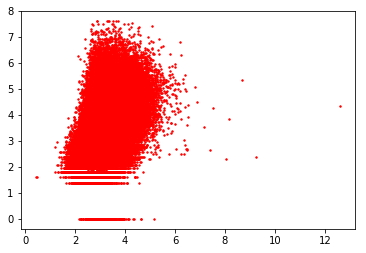

In [79]:
plt.scatter(y_pred1,y_train, s = 2, c = "r")
plt.show()

This simple pipeline already looks very promising!